In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
from fastai.vision import *
import pandas as pd
import pickle
from pathlib import Path

In [15]:
DIR_IMGS = Path('/home/rubn/Desktop/COVID')

In [16]:
def open_arr_image(fn, **kwargs):
    """ Converts numpy array to fastai Image with 3 channels """
    # It has one channel, get that
    arr = np.load(fn)
    data = torch.from_numpy(arr)
    # Stack 3 copies as new channels
    data = torch.stack([data, data, data])
    return Image(data)

# Use function to read images
vision.data.open_image = open_arr_image

In [17]:
# Recargar databunch
DIR_IMGS = Path('/home/rubn/Desktop/COVID')
DIR_DATA = DIR_IMGS
db = load_data(DIR_IMGS, 'COVID_resp_db.pkl').normalize(imagenet_stats)
len(db.train_ds), len(db.valid_ds)

(26227, 1434)

In [18]:
learn = cnn_learner(db, models.vgg19_bn)

In [6]:
learn.data.batch_size = 128

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


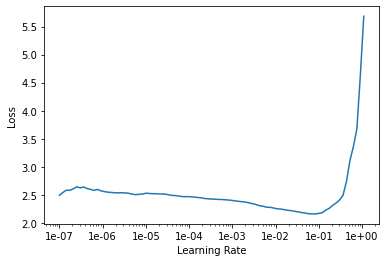

In [7]:
learn.lr_find()
learn.recorder.plot(skip_start=0, skip_end=2) # Mostrar más valores del final de los que hay por defecto

In [8]:
lr = 1e-03 # Update!

In [9]:
# Train before unfreezing
learn.fit_one_cycle(4, slice(lr))

epoch,train_loss,valid_loss,time
0,1.597630,1.349260,01:24
1,1.123043,1.190895,01:25
2,0.949592,1.128144,01:26
3,0.860274,1.122311,01:26


In [ ]:
learn.save(DIR_DATA/'covid_vgg19_stage-1')
learn.load(DIR_DATA/'covid_vgg19_stage-1')
learn.show_results()

In [10]:
learn.unfreeze()
learn.freeze_to(3)
learn.fit_one_cycle(2, max_lr=slice(lr/100, lr/10))

epoch,train_loss,valid_loss,time
0,0.858682,1.100841,01:25
1,0.837529,1.101111,01:25


In [19]:
#learn.save(DIR_DATA/'covid_vgg19_trained')
learn.load(DIR_DATA/'covid_vgg19_trained')

Learner(data=ImageDataBunch;

Train: LabelList (26227 items)
x: ImageList
Image (3, 50, 245),Image (3, 50, 245),Image (3, 50, 245),Image (3, 50, 245),Image (3, 50, 245)
y: CategoryList
none,none,none,none,none
Path: /home/rubn/Desktop/COVID;

Valid: LabelList (1434 items)
x: ImageList
Image (3, 50, 245),Image (3, 50, 245),Image (3, 50, 245),Image (3, 50, 245),Image (3, 50, 245)
y: CategoryList
none,none,none,none,none
Path: /home/rubn/Desktop/COVID;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=F

In [11]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

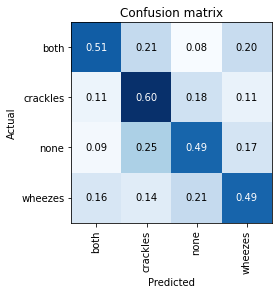

In [12]:
interp.plot_confusion_matrix(normalize=True)

In [ ]:
interp.top_losses()

In [20]:
learn.export(DIR_DATA/'covid_vgg19_trained_1.pkl')